In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model

import keras.backend as K
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers


import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

In [ ]:
data_dir = "/content/dataset/super-ai-image-classification"
os.listdir(data_dir)

['train.csv', '.ipynb_checkpoints', 'val.csv', 'val_images', 'train_images']

In [ ]:
total_df = pd.read_csv(data_dir +"/" + "train.csv")
total_df.tail()

,id,category
1720,245a6e32-55b1-47b9-ad43-527b95c9d770.jpg,0
1721,6e8cf04c-6ce1-4971-8978-0d40094378b8.jpg,0
1722,d6a0e4cb-1b83-4867-b9f8-9759a3ba22b0.jpg,0
1723,d6a4760d-c694-4d30-82a5-196f32ddec64.jpg,1
1724,62a559b3-6b50-468d-bb7a-665ef2fee227.jpg,1


In [ ]:
t1 = total_df.loc[ total_df["category"] == 1]
t0 = total_df.loc[ total_df["category"] == 0]
t1

,id,category
696,930195df-7e46-4ca6-91a0-2764f44e13c6.jpg,1
719,5270bca6-2716-4f72-9601-004fba1c536e.jpg,1
724,c0894ee2-a50a-4eea-aa01-6ab833017f1d.jpg,1
746,39c1d8dd-5ee0-46f5-9422-45444db462c6.jpg,1
767,d20bcabd-ca32-4e0d-929e-4f1e8f942e27.jpg,1
...,...,...
1714,ba7a97d6-5222-4bfb-8a55-fec91e58b0c1.jpg,1
1715,b2516da7-861f-4066-8186-4224528848ea.jpg,1
1717,a9c8cfdc-0f43-4fee-b1e3-d5ad4f2f7936.jpg,1
1723,d6a4760d-c694-4d30-82a5-196f32ddec64.jpg,1


In [ ]:
# Importing Image module from PIL package 
from PIL import Image 
for fig in t1['id']:
    #load images into images of size 180x180x3
    im1 = Image.open(r"/content/dataset/super-ai-image-classification/train_images/"+fig)
    im2 = im1.copy()
    im2.save(r"/content/data1/"+"_new"+fig )


In [ ]:
copy1 = np.array(os.listdir('/content/data1'))
df = pd.DataFrame(data=copy1 , columns=["id"])
df["category"] = 1
total_df = pd.concat([total_df,df],ignore_index=True)
total_df

,id,category
0,6380fb87-18fe-4b76-a085-639a4e01b664.jpg,0
1,9956035b-0500-47b7-b508-cc7414c10270.jpg,0
2,fa6b4604-a080-410b-a8d1-fdf7cf61a92d.jpg,0
3,6e6dc67b-73ba-404b-b685-1f726d0357c3.jpg,0
4,15121f8e-f428-4cd5-83bf-1c9a051aea54.jpg,0
...,...,...
2128,_new846eb74d-f3c4-4643-a8d2-dec4f2cc8e85.jpg,1
2129,_newa9ad55a1-6ec8-4616-899f-82efb566bb48.jpg,1
2130,_new7975232c-ac34-470e-9816-34bd1793d270.jpg,1
2131,_newbd123317-2d4f-44fa-8234-b753a46bea2e.jpg,1


In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(total_df, test_size=0.2, random_state=123, shuffle=True)
print(train_df.shape)
print(test_df.shape)
test_df.head()

(1706, 2)
(427, 2)


,id,category
1677,2cb52249-ea01-4b0c-b54c-3f9f2f43b822.jpg,0
1075,0763f389-32b2-42c9-9fc2-301491f9e5f9.jpg,1
1992,_new45ebc45a-677f-4b9e-b044-bc9f688048ec.jpg,1
1135,fa4341f8-cf0f-4ed6-a9cf-9c978a35d664.jpg,0
1828,_new315d4744-14f5-48f8-8e77-f140b21f44ce.jpg,1


In [ ]:
img_h = 300
img_w= 300

In [ ]:
def prepareImages(data, m, dataset):
    print("Preparing images")
    X_train = np.zeros((m, img_w, img_h, 3))
    count = 0
    
    for fig in data['id']:
        #load images into images of size 180x180x3
        try:
          img = image.load_img(data_dir +"/"+ dataset +"/"+fig, target_size=(img_w, img_h, 3))
        except:
          img = image.load_img("/content/data1/"+fig, target_size=(img_w, img_h, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)
        X_train[count] = x
        if (count%100 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    return X_train

def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # print(integer_encoded)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    # print(onehot_encoded)
    
    y = onehot_encoded
    # print(y.shape)
    return y, label_encoder

In [ ]:
Xtrain = prepareImages(train_df, train_df.shape[0], "train_images")
Xtrain /= 255

Preparing images
Processing image:  1 ,  6e7b7004-1452-4ef4-8167-44b366990598.jpg
Processing image:  101 ,  _new75d8e036-4dc4-458d-95b9-a89cc9bf412a.jpg
Processing image:  201 ,  83496dbe-0a07-4295-8421-84b8643b0589.jpg
Processing image:  301 ,  795fac2d-8800-4e40-b38a-b919156a8d9e.jpg
Processing image:  401 ,  b066edb7-5c66-4318-a900-01c6e14b1b80.jpg
Processing image:  501 ,  0ceb9db7-7000-44eb-8f58-82b67f4cd844.jpg
Processing image:  601 ,  _newd1a18bba-ad62-444f-9bc1-fc12a0e7a126.jpg
Processing image:  701 ,  2afbb65d-6ad8-414a-9da6-d49943724f5d.jpg
Processing image:  801 ,  d2066692-b0aa-452c-a985-71f5c8b77dd3.jpg
Processing image:  901 ,  c77e92fa-6fde-4737-bc60-08d3ef7085b2.jpg
Processing image:  1001 ,  d0c8dd04-c41a-4a34-829e-6e361a7db6e5.jpg
Processing image:  1101 ,  _new0aa5659c-253c-4fd4-a0d8-1e428b4f4a8d.jpg
Processing image:  1201 ,  a3616fb9-60e1-4cee-8df5-24c056242640.jpg
Processing image:  1301 ,  9405945d-7918-4287-ba7b-dcd2bf33c9ab.jpg
Processing image:  1401 ,  e49a

In [ ]:
Ytrain, label_encoder = prepare_labels(train_df['category'])
Ytrain.shape

(1706, 2)

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers, Model
from tensorflow.keras import optimizers

ires  = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(img_w,img_h,3))
for l in ires.layers[:]:
  l.trainable  = False
# x_in = layers.Input(shape=(img_h, img_w, 3))
# x = ires(x_in)
x = layers.Flatten()(ires.output)
x = layers.Dense(2 , activation='softmax')(x)
model = Model(ires.input, x)
model.summary()
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 149, 149, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 149, 149, 32) 0           batch_normalization_203[0][0]    
_______________________________________________________________________________________

In [ ]:
# # VGG16 Transfer learning
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras import layers, Model

# vgg = VGG16(include_top=False, weights='imagenet', input_shape=(img_w,img_h,3))
# # fit input
# # x_in = layers.Input(shape=(img_h, img_w, 3))
# # x = layers.Conv2D(3, 1)(x_in)
# # x = vgg(x)

# # fit output
# x = layers.Flatten()(vgg.output)
# x = layers.Dense(2, activation='softmax')(x)
# model = Model(vgg.input, x)
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [ ]:
print(Xtrain.shape)
Ytrain.shape

(1706, 300, 300, 3)


(1706, 2)

In [ ]:
# VALIDATION_ACCURACY = []
# VALIDAITON_LOSS = []

# save_dir = '/saved_models/'
# fold_var = 1

# for train_index, val_index in kf.split(Xtrain,Ytrain):
#   training_X, training_Y = Xtrain[train_index], Ytrain[train_index]
#   validation_X, validation_Y = Xtrain[val_index], Ytrain[train_index]

#   # train_data_generator = idg.flow_from_dataframe(training_data, directory = image_dir,
#   # 					       x_col = "filename", y_col = "label",
#   # 					       class_mode = "categorical", shuffle = True)
#   # valid_data_generator  = idg.flow_from_dataframe(validation_data, directory = image_dir,
#   #             x_col = "filename", y_col = "label",
#   #             class_mode = "categorical", shuffle = True)
#   # valid_data_generator = validation_X, validation_Y
#   # CREATE NEW MODEL
#   # model = create_new_model()
#   # COMPILE NEW MODEL
#   model.compile(loss='categorical_crossentropy',
#           optimizer='adam',
#           metrics=['accuracy'])

#   # CREATE CALLBACKS
#   # checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var), 
#   #             monitor='val_accuracy', verbose=1, 
#   #             save_best_only=True, mode='max')
#   # callbacks_list = [checkpoint]
#   # There can be other callbacks, but just showing one because it involves the model name
#   # This saves the best model
#   # FIT THE MODEL
#   history = model.fit(training_X, training_Y, epochs=10, batch_size=128, validation_data=(validation_X, validation_Y))

#   fold_var += 1
	

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(Xtrain, Ytrain, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
14/14 [==============================] - 34s 2s/step - loss: 5.3044 - accuracy: 0.6846
Epoch 2/20
14/14 [==============================] - 35s 2s/step - loss: 1.1337 - accuracy: 0.8787
Epoch 3/20
14/14 [==============================] - 34s 2s/step - loss: 0.3984 - accuracy: 0.9250
Epoch 4/20
14/14 [==============================] - 34s 2s/step - loss: 0.1445 - accuracy: 0.9795
Epoch 5/20
14/14 [==============================] - 34s 2s/step - loss: 0.0550 - accuracy: 0.9871
Epoch 6/20
14/14 [==============================] - 34s 2s/step - loss: 0.0061 - accuracy: 0.9971
Epoch 7/20
14/14 [==============================] - 34s 2s/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/20
14/14 [==============================] - 34s 2s/step - loss: 7.0009e-04 - accuracy: 1.0000
Epoch 9/20
14/14 [==============================] - 34s 2s/step - loss: 3.4650e-04 - accuracy: 1.0000
Epoch 10/20
14/14 [==============================] - 34s 2s/step - loss: 2.1449e-04 - accuracy: 1.0000
Epoch 1

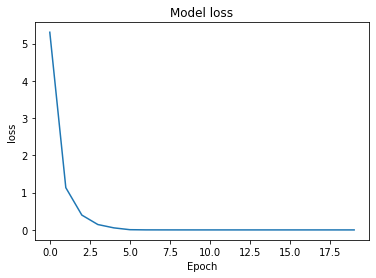

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

test


In [ ]:
Xtest = prepareImages(test_df, test_df.shape[0], "train_images")
Xtest /= 255


Preparing images
Processing image:  1 ,  2cb52249-ea01-4b0c-b54c-3f9f2f43b822.jpg
Processing image:  101 ,  addc504a-ad35-4c9a-bdc5-4a23a9d32f5a.jpg
Processing image:  201 ,  fd1c6935-114a-4444-80f6-294e7a7dec53.jpg
Processing image:  301 ,  _newd36a679b-7638-4b6d-bad7-6c6419fea3ed.jpg
Processing image:  401 ,  317240c8-2382-4d42-98af-c90c2791699e.jpg


In [ ]:
# print(test_df['category'].shape)
Ytest = test_df['category'].to_numpy() #.argmax(axis=1)
Ytest.shape

(427,)

In [ ]:
# 100 epoch -> 0.9391304347826087
# 50 epoch -> 0.9391304347826087 , 0.9391304347826087
# 40 epoch -> 0.9507246376811594
# 30 epoch -> 0.9565217391304348 , 0.9507246376811594, 0.9681159420289855
# 25 epoch ->0.936231884057971
# 20 epoch -> 0.9536231884057971
# 10 epoch -> 0.936231884057971 ,0.936231884057971
# 123

In [ ]:
Ztest = model.predict(Xtest)
np.sum(Ztest.argmax(axis=1) == Ytest)/len(Ztest)
# 48
# 10 epoch 0.9420289855072463(batch size = 128) 0.936231884057971(batch size = 100)
# 20 epoch 0.9594202898550724
# 25 epoch 0.9478260869565217
# 30 epoch 0.9536231884057971(batch size = 128) 0.9478260869565217(batch size = 100)
# 50 epoch 0.9565217391304348(batch size = 128) 0.9507246376811594(batch size = 100)
# 0.9507246376811594

0.9484777517564403

In [ ]:
# Ztest.argmax(axis=1)

In [ ]:
# print(Ztest.argmax(axis=1))
# Ytest == Ztest.argmax(axis=1)

submission

In [ ]:
val = os.listdir(data_dir + "/val_images")
print(len(val))

398


In [ ]:
col = ['id']
val_df = pd.DataFrame(val, columns=col)
val_df['category'] = ''
val_df.head()
# col = ['id']
# test_df = pd.DataFrame(test, columns=col)
# test_df['Id'] = ''

,id,category
0,f088513a-7070-41fd-89fd-2c4f1bab45e0.jpg,
1,ab81872a-bf16-49ee-a851-ad6f126145e1.jpg,
2,068dd93a-f1d1-4e52-ab7b-77894723c209.jpg,
3,ec5a83ea-5f98-43a4-84a8-7f05e218300d.jpg,
4,0cb58079-9bad-4f1d-923c-30ab4c7a3808.jpg,


In [ ]:
Xval = prepareImages(val_df, val_df.shape[0], "val_images")
Xval /= 255

Preparing images
Processing image:  1 ,  f088513a-7070-41fd-89fd-2c4f1bab45e0.jpg
Processing image:  101 ,  241a4078-7f5a-42d5-a652-00b6643ab13f.jpg
Processing image:  201 ,  e6aa6e21-b1b9-4779-b388-b2d4eced33c7.jpg
Processing image:  301 ,  261e4276-04d0-4dbd-befc-be5c89056a6f.jpg


In [ ]:
# predictXtrain = model.predict(np.array(X))

In [ ]:
# y.shape

In [ ]:
# predictXtrain.argmax(axis=1).shape

In [ ]:
# t = os.listdir(data_dir + "/train_images")
# col = ['id']
# t_df = pd.DataFrame(t, columns=col)
# t_df['category'] = ''
# # val_df.head()
# # col = ['id']
# # test_df = pd.DataFrame(test, columns=col)
# # test_df['Id'] = ''
# for i, pred in enumerate(predictXtrain):
#     # print(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]).reshape(1,2))
#     # val_df.loc[i, 'category'] = ' '.join(str(Ztest.argmax(axis=1)))
#     t_df.loc[i, 'category'] = ' '.join(str(label_encoder.inverse_transform(pred.argsort()[-5:][::-1])[0]))

# t_df.to_csv('t.csv', index=False)

In [ ]:
# predictXtrain.argmax(axis=1)==y

In [ ]:
# predictions.argmax(axis=1)

In [ ]:
predictions = model.predict(np.array(Xval))
# print(predictions)

In [ ]:
print(predictions.argmax(axis=1))

[1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1]


In [ ]:
# np.sum(Ztest.argmax(axis=1) == Ytest)/len(Ztest)
for i, pred in enumerate(predictions):
    # print(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]).reshape(1,2))
    # val_df.loc[i, 'category'] = ' '.join(str(Ztest.argmax(axis=1)))
    val_df.loc[i, 'category'] = ' '.join(str(label_encoder.inverse_transform(pred.argsort()[-5:][::-1])[0]))

In [ ]:
(val_df['category'])
val_df.head(10)

,id,category
0,f088513a-7070-41fd-89fd-2c4f1bab45e0.jpg,1
1,ab81872a-bf16-49ee-a851-ad6f126145e1.jpg,0
2,068dd93a-f1d1-4e52-ab7b-77894723c209.jpg,0
3,ec5a83ea-5f98-43a4-84a8-7f05e218300d.jpg,1
4,0cb58079-9bad-4f1d-923c-30ab4c7a3808.jpg,1
5,1f65d208-9b6d-4e22-a468-558070c86911.jpg,0
6,0eaf2403-d8c9-4ad5-b89b-69bb178dba30.jpg,0
7,6887326e-b44f-4244-a4ba-e29ed80960ef.jpg,0
8,dbb3c753-5cf3-4016-aedf-cec32aa34899.jpg,0
9,543b675e-d3f9-4b8c-8fe5-c8b2ef945fd0.jpg,1


In [ ]:
val_df.groupby('category').count()

,id
category,
0,282
1,116


In [ ]:
val_df.to_csv('last_chance_Inception-ResNet v2_30epoch.csv', index=False)